In [3]:
import torch
from torchvision import datasets, transforms
import helper

In [ ]:
# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])

# Download full-dataset with transformations 'transform'
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)

# Load the data in batches
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle = True)

#Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

torch.Size([1, 28, 28])


<AxesSubplot:>

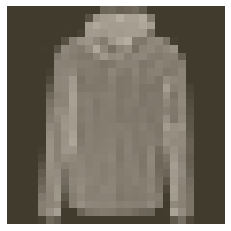

In [47]:
image, label = next(iter(trainloader))
print(image[4].shape)
helper.imshow(image[4,:])

In [35]:
# Defining Network Architecture

class Network(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.hidden1 = nn.Linear(784, 128)
        self.act1 = nn.ReLU()
        self.hidden2 = nn.Linear(128,64)
        self.act2 = nn.ReLU()
        self.output = nn.Linear(64,10)
        self.act3 = nn.LogSoftmax(dim=1)
    
    def forward(self, X):
        
        X = self.hidden1(X)
        X = self.act1(X)
        X = self.hidden2(X)
        X = self.act2(X)
        X = self.output(X)
        X = self.act3(X)
        
        return X


In [36]:
model = Network()

In [37]:
criterion = nn.NLLLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)

In [49]:
for e in range(5):
    
    train_loss = 0
    for income, labels in trainloader:
                
        optimizer.zero_grad()
        
        income = income.reshape(income.shape[0], -1)
        output = model(income)
        
        loss = criterion(output, labels)
        
        loss.backward()
        
        optimizer.step()
        train_loss  += loss.item()
        
    print(f"Training loss: {train_loss/len(trainloader)}")


Training loss: 0.45179532656569216
Training loss: 0.41768765320846524
Training loss: 0.4082094918150129
Training loss: 0.39449284678456115
Training loss: 0.3863467324548947


In [ ]:
torch.softmax(img, dim = 1)

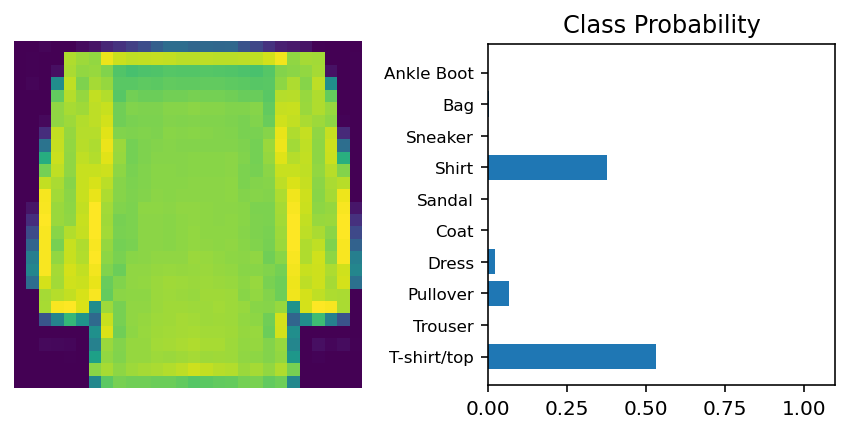

In [67]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helper

# Test out your network!

dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[1]
# Convert 2D image to 1D vector
img = img.resize_(1, 784)

# TODO: Calculate the class probabilities (softmax) for img
output = model(img)
ps = torch.exp(output)

# Plot the image and probabilities
helper.view_classify(img.resize_(1, 28, 28), ps, version='Fashion')

Exercise: Implement the validation loop below and print out the total accuracy after the loop. You can largely copy and paste the code from above, but I suggest typing it in because writing it out yourself is essential for building the skill. In general you'll always learn more by typing it rather than copy-pasting. You should be able to get an accuracy above 80%.